In [1]:
import numpy as np
import cv2
import glob
from cv2_plt_imshow import cv2_plt_imshow
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image

In [2]:
def loadData(path,img,dim):
    for file in glob.glob(path):
        im = cv2.imread(file,0)
        im = cv2.resize(im,(dim,dim))
        img.append((im))
    return img

In [3]:
def prepareInput(path,dim):
    data = []
    data = loadData(path,data,dim)
    newData = np.array(data).reshape(np.array(data).shape[0],-1)
    return np.array(data),newData

In [4]:
def findTopK(k,eigvals,eigvecs):
    return eigvecs[:,:k],eigvals[:k]

In [5]:
def plotFaces(image,title):
    fig = plt.figure(figsize=(15,10))
    plt.title(title, fontsize = "25")
    cols=10
    rows=5
    plt.tight_layout()
    for i in range(50):
        plt.axis('off')
        fig.add_subplot(rows,cols,i+1).sharey
        plt.imshow(image[i],cmap='gray')
        plt.axis('off')
        plt.title(i+1)  

In [6]:
def preProcessing(image,EF_mean):
    for i in range(image.shape[0]):
        newData = data.reshape(image.shape[0],-1)
        subtractedData = newData - EF_mean[i]
    return subtractedData

In [7]:
def eigenDecomposing(data,typ,dim):
    newData = data.reshape(data.shape[0],-1)
    Mean = np.mean(newData,axis=0)
    Mean_2 = np.copy(Mean)
    Mean_2[Mean == 0] = 1
    subtracted_Mean = (newData-Mean)/Mean_2
    Covariance = (np.dot(subtracted_Mean,subtracted_Mean.T))
    plt.title("Mean Face")
    plt.axis('off')
    if typ=='dict':
        Mean2 = np.array(Mean.reshape(data[1][0].shape[0],data[1][0].shape[1]),dtype = np.uint64)
    else:
        Mean2 = np.array(Mean.reshape(dim,dim),dtype = np.uint64)
    plt.imshow(Mean2,cmap='gray')
    plt.show()
    return Mean,subtracted_Mean,Covariance,newData

In [8]:
def FindFaceSpace(Covariance,subtracted_Mean,xDim,yDim):
    w,v = np.linalg.eig(Covariance)
    sorted_index = np.argsort(w)[::-1] # reveresly sorted index
    eigvals = w[sorted_index]
    eigvecs = v[:,sorted_index]
    print(eigvecs.shape)
    K = getNoComponent(eigvals,0.9)
    Vecs,Vals = findTopK(K,eigvals,eigvecs)
    image = np.dot(subtracted_Mean.T,Vecs)
    facespace = image.reshape(xDim,yDim,K).T
    print(facespace.shape)
    for i in range(facespace.shape[0]):
        facespace[i] = facespace[i].T
    return facespace,image

In [61]:
def getNoComponent(eigVal,threshold):
    varRatio = eigVal/np.sum(eigVal)
    s = 0
    i = -1
    while s<threshold and s<1.0:
        i+=1
        s+=varRatio[i]
    print("Top ",i,"eigenvector(s) selected:")
    return i

(1000, 128, 128)
(1000, 16384)


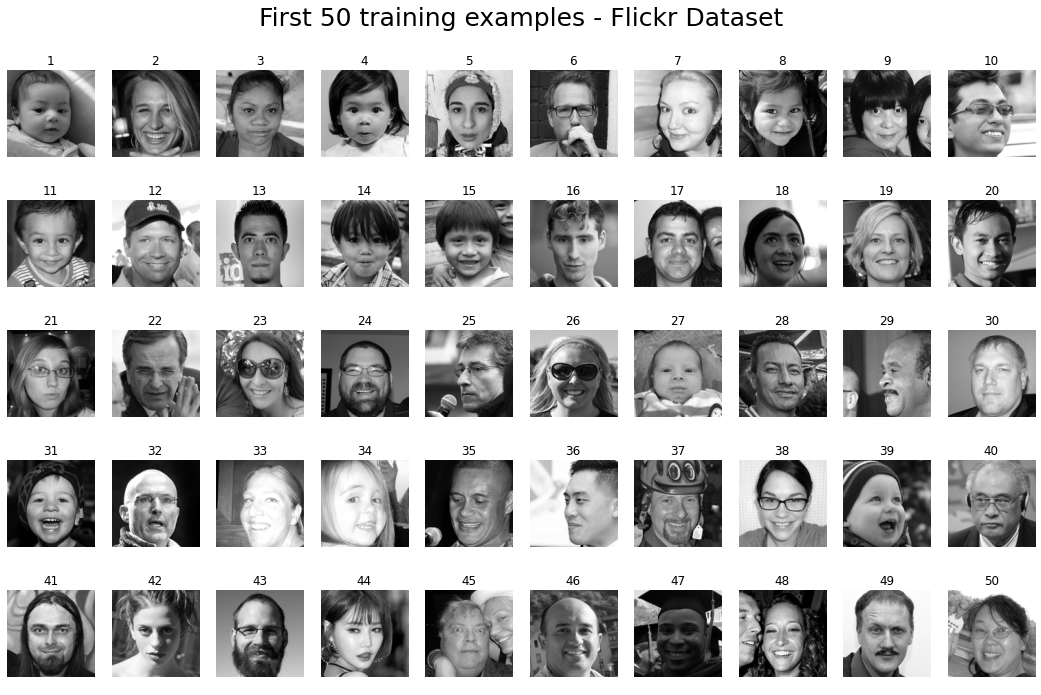

In [62]:
dim=128
path_rand = r"Random_Faces/*.*"
random_faces,new_rf = prepareInput(path_rand,dim)
print(random_faces.shape)
print(new_rf.shape)
plotFaces(random_faces,"First 50 training examples - Flickr Dataset\n")

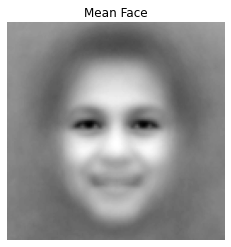

Sub shape:  (1000, 1000)
(1000, 1000)
Top  123 eigenvector(s) selected:
(123, 128, 128)


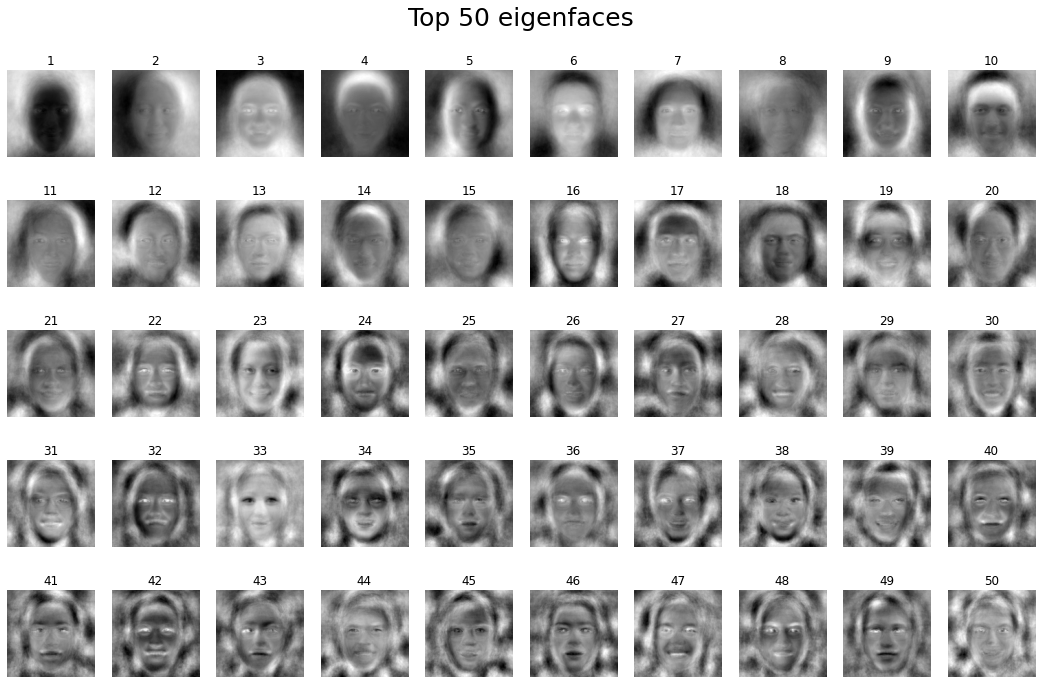

In [63]:
data = np.array(random_faces)
xDim = data.shape[1]
yDim = data.shape[2]
Mean,subtracted_Mean,Covariance,newData = eigenDecomposing(data,'list',dim)
print("Sub shape: ",Covariance.shape)
FaceSpace,Images = FindFaceSpace(Covariance,subtracted_Mean,xDim,yDim)
plotFaces(FaceSpace,"Top 50 eigenfaces\n")
Weights_Faces = np.dot(subtracted_Mean,np.dot(Images,np.linalg.inv(np.dot(Images.T,Images))))

(1000, 123)


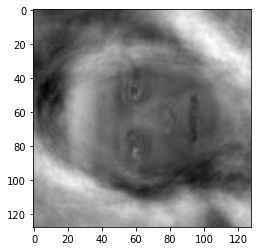

In [64]:
#Weights_Faces.shape
print(Weights_Faces.shape)
plt.imshow((Images@(Weights_Faces.T)).T[0].reshape(128,128),cmap='gray')
#plt.imshow(Images.T.reshape(1000,128,128)[0].T,cmap='gray')
#plt.imshow((Weights_Faces.T@Images.T).reshape(128,128).T,cmap='gray')

In [48]:
np.linalg.norm(Weights_Faces[0]

array([2.55881016e+11, 1.73399520e+12, 6.21511832e+11, 2.93636693e+11,
       1.00376530e+12, 2.99358914e+12, 2.56827824e+10, 3.50854738e+11,
       4.54580769e+11, 4.87916824e+11, 9.39996921e+11, 1.44323611e+12,
       5.06389155e+11, 5.13056712e+11, 1.70657424e+12, 6.65439280e+11,
       1.78528031e+12, 4.39121963e+11, 7.90042711e+10, 6.96110748e+11,
       9.23115635e+11, 1.62351126e+12, 1.66405040e+12, 5.62350608e+11,
       6.34529518e+11, 1.06898672e+12, 2.75609039e+11, 6.65980024e+11,
       7.06394977e+11, 2.26812378e+11, 1.15838975e+12, 2.46259160e+12,
       1.42275273e+12, 1.93005246e+10, 7.09733353e+10, 1.10383086e+12,
       1.84989966e+12, 1.19823150e+12, 1.77240632e+11, 1.76743832e+11,
       4.50745322e+11, 1.77724897e+12, 5.01231582e+11, 2.73718031e+11,
       5.02877768e+11, 2.49591276e+11, 1.18154133e+12, 1.82903415e+12,
       9.32343318e+11, 8.51912842e+11, 1.53845016e+12, 2.05798608e+12,
       1.63123154e+11, 4.23998742e+10, 2.16061879e+12, 6.45789554e+11,
      

In [41]:
Labels=[]
for i in range(len(Weights_Faces)):
    Labels.append(i+1)

Text(0, 0.5, 'Norm value')

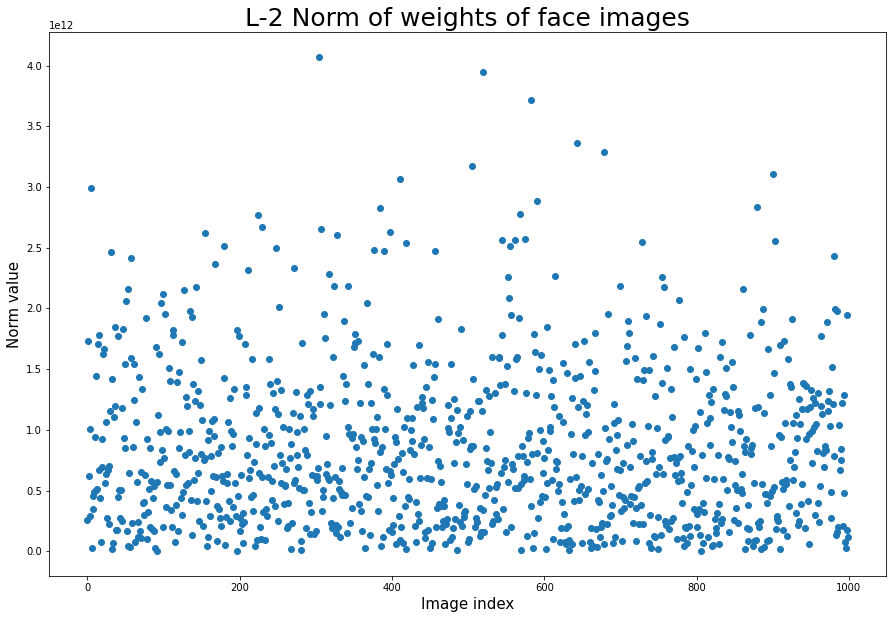

In [45]:
plt.figure(figsize=(15,10))
plt.plot(np.linalg.norm(Weights_Faces,axis=1),'o')
#plt.bar(Labels,np.linalg.norm(Weights_Faces,axis=1),color ="blue" )
plt.title("L-2 Norm of weights of face images",size=25)
plt.xlabel("Image index",size=15)
plt.ylabel("Norm value",size=15)

In [77]:
# Non-Face images
dim = 128
path_nf = r"Non_Faces/*.*"
non_faces,new_nf = prepareInput(path_nf,dim)
xDim = non_faces.shape[1]
yDim = non_faces.shape[2]
newNF = non_faces.reshape(non_faces.shape[0],-1)
W_nonNF = np.dot(newNF,np.dot(Images,np.linalg.inv(np.dot(Images.T,Images))))

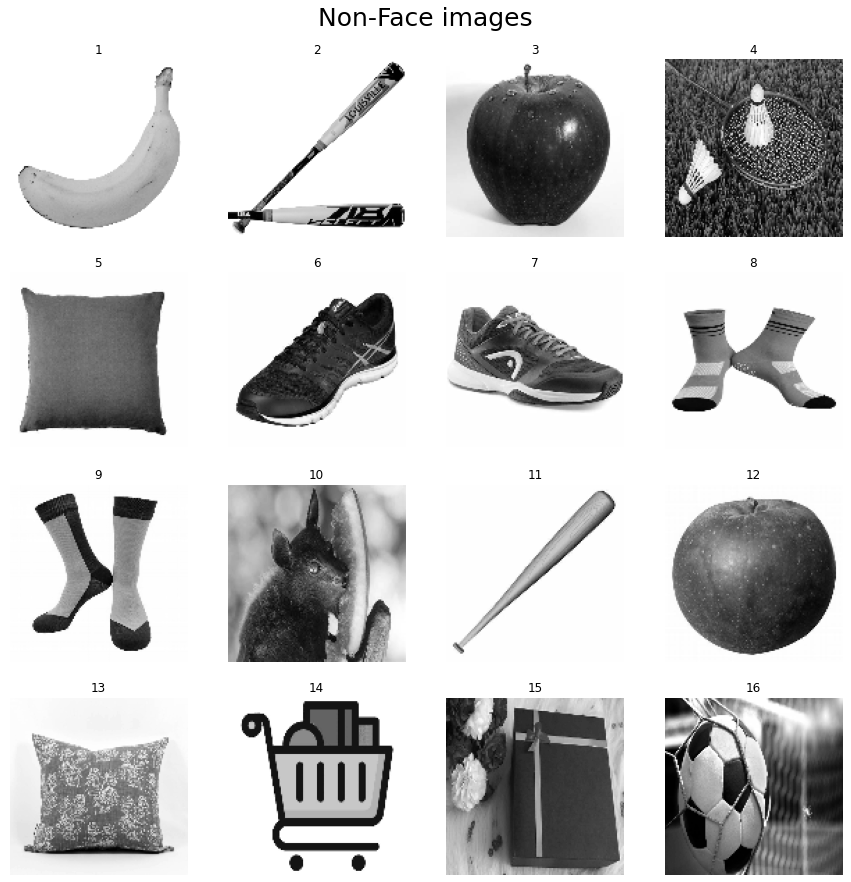

In [89]:
fig = plt.figure(figsize=(15,15))
plt.title("Non-Face images\n", fontsize = "25")
cols=4
rows=4
for i in range(cols*rows):
    plt.axis('off')
    fig.add_subplot(rows,cols,i+1).sharey
    plt.imshow(non_faces[i],cmap='gray')
    plt.axis('off')
    plt.title(i+1)      

Text(0, 0.5, 'Norm value')

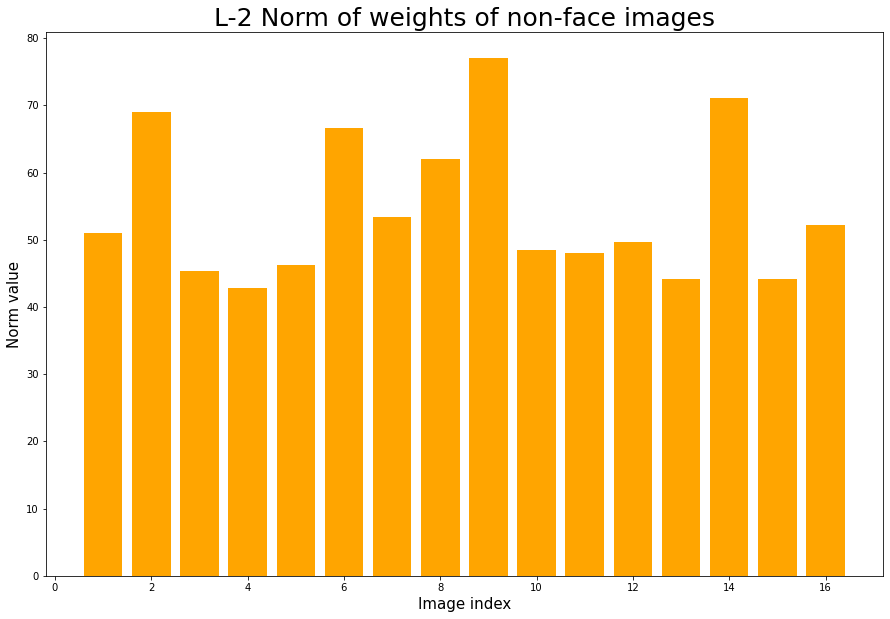

In [189]:
plt.figure(figsize=(15,10))
Lab=[]
for i in range(16):
    Lab.append(i+1)
plt.bar(Lab,np.linalg.norm(W_nonNF,axis=1),color ="orange" )
plt.title("L-2 Norm of weights of non-face images",size=25)
plt.xlabel("Image index",size=15)
plt.ylabel("Norm value",size=15)
#plt.plot(np.linalg.norm(W_nonNF,axis=1),"o")

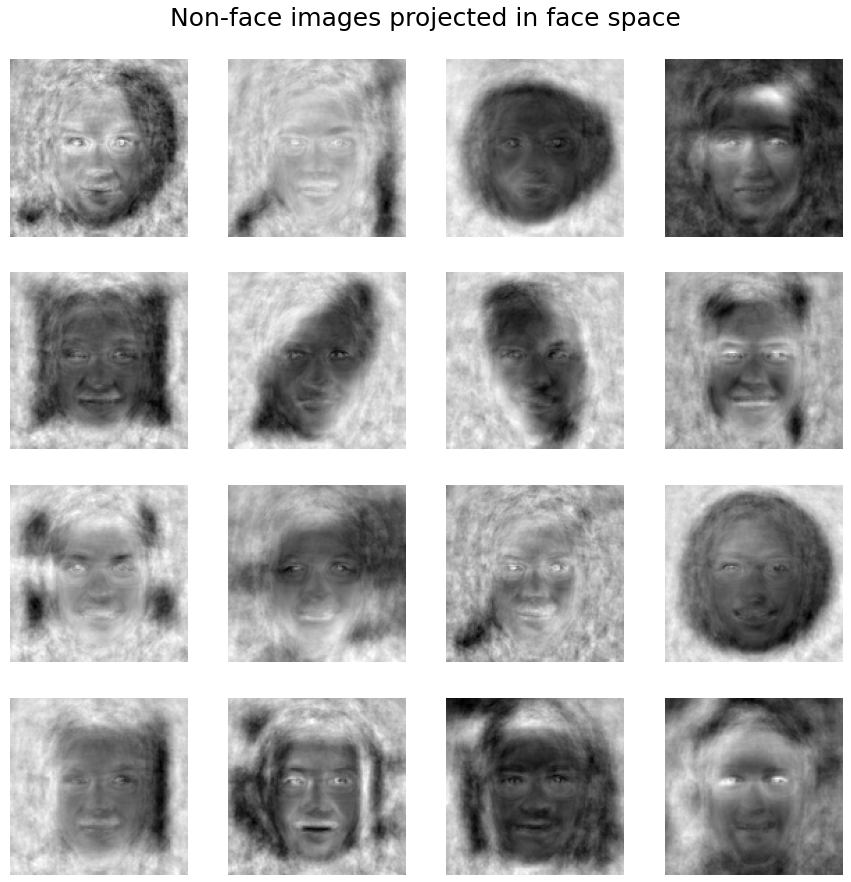

In [64]:
# Reconstructing and Plotting Non-face images 
fig = plt.figure(figsize=(15,15))
plt.title("Non-face images projected in face space\n", fontsize = "25")
cols=4
rows=4
for i in range(16):
    plt.axis('off')
    fig.add_subplot(rows,cols,i+1).sharey
    plt.imshow((np.dot(W_nonNF[i],Images.T)).reshape(dim,dim).T,cmap='gray')
    plt.axis('off')

50.993763673103835

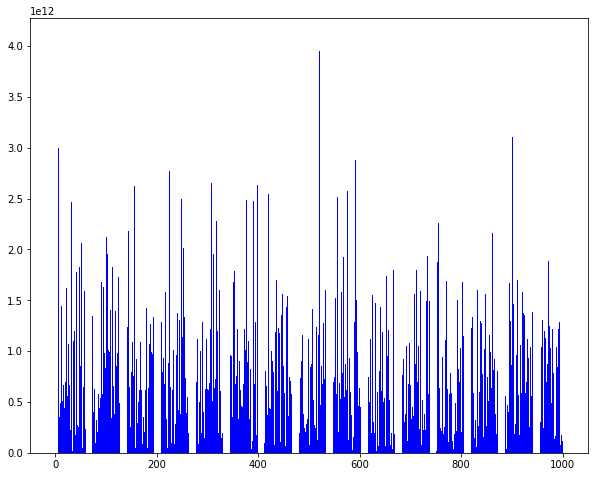

In [194]:
#plt.figure(figsize=(10,8))
#plt.plot((np.linalg.norm(Weights_Faces,axis=1)),'o',label="Faces")
#plt.plot(np.linalg.norm(W_nonNF,axis=1),'o',label="Non-Faces")
#plt.legend()

plt.figure(figsize=(10,8))
plt.bar(Lab,np.linalg.norm(W_nonNF,axis=1),color ="orange")
plt.bar(Labels,np.linalg.norm(Weights_Faces,axis=1),color ="blue")
#plt.legend()
np.linalg.norm(W_nonNF,axis=1)[0]

## Main program ends here, below is with olivetti faces and Yale Face Dataset. The code has not yet been checked for Compile time and logical errors and the Yale Face Dataset hasn't been attached in the zip.

In [11]:
import sklearn.datasets
DD=sklearn.datasets.fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)

In [12]:
eigvals, eigvecs = la.eig(Covariance)
eigvals = eigvals.real
Vecs,Vals = findTopK(40,eigvals,eigvecs)
image = np.dot(subtracted_Mean.T,Vecs.T)

NameError: name 'Covariance' is not defined

In [163]:
b = np.array(a)
cv2.resize(b,(100,100))

(100, 100)

In [49]:
#Face vs Face Dataset
numClasses=15
types = ['centerlight','glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad', 'sleepy', 'surprised','wink']
Data = {}
ImageUniverse = []
for i in range(numClasses):
    images=[]
    for j in types:
        if i>=9:
            path = r"yalefaces/subject"+(str)(i+1)+"."+j
        else:
            path = r"yalefaces/subject0"+(str)(i+1)+"."+j
        images.append(np.array(Image.open(path)))
        ImageUniverse.append(np.array(Image.open(path)))
    Data[i+1] = images
#eigenDecomposing(Data,'dict')

In [52]:
yDim = Data[1][0].shape[0]
xDim = Data[1][0].shape[1]
#ImageUniverse[0].shape
#plotFaces(ImageUniverse,"First 50 faces - Yale Faces")
#facespace = image.reshape(xDim,yDim,40).T

In [53]:
#for i in range(Data):
#    Data[i]
xSize = np.array(Data[1]).shape[1]
ySize = np.array(Data[1]).shape[2]
MeanFaces=[]
newFaces=[]
for i in range(len(Data)):
    newFaces.append(np.array(Data[i+1]).reshape(np.array(Data[1]).shape[0],-1))
    MeanFaces.append(np.mean(newFaces,axis=0))

In [55]:
MeanFaces[0].shape
plt.plot()

array([[130., 130., 130., ...,  68.,  68.,  68.],
       [130., 130., 130., ...,  68.,  68.,  68.],
       [130., 130., 130., ...,  68.,  68.,  68.],
       ...,
       [130., 130., 130., ...,  68.,  68.,  68.],
       [130., 130., 130., ...,  68.,  68.,  68.],
       [130., 130., 130., ...,  68.,  68.,  68.]])

ValueError: cannot reshape array of size 855360 into shape (243,320)

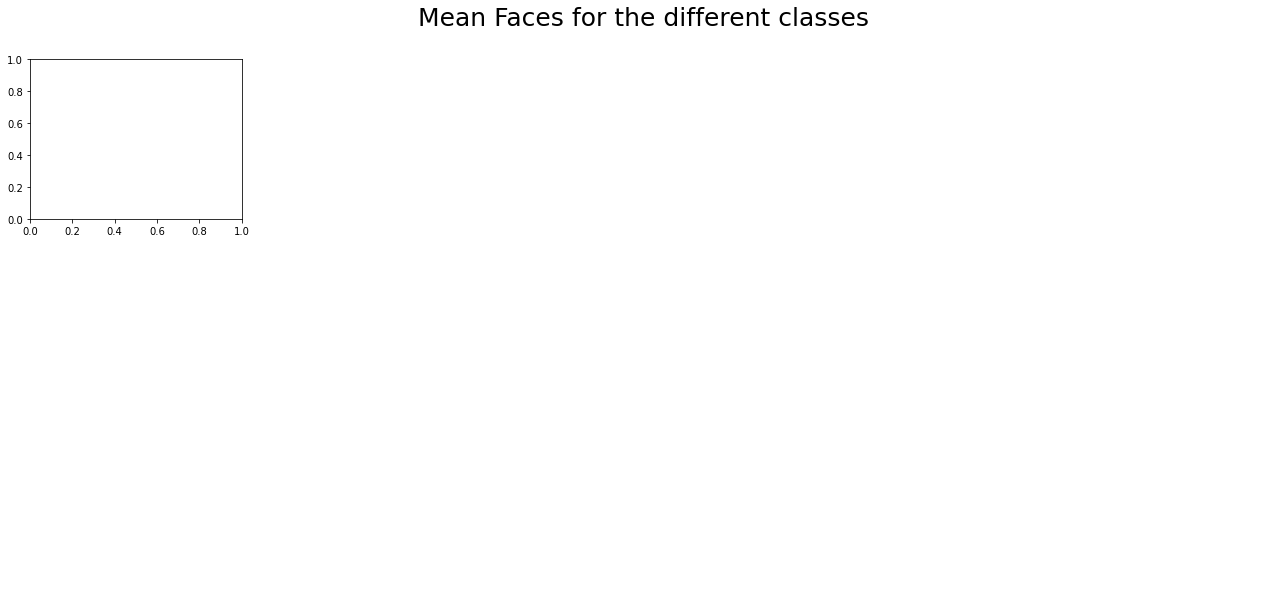

In [54]:
fig = plt.figure(figsize=(22,10))
plt.title("Mean Faces for the different classes\n", fontsize = "25")
cols=5
rows=3
for i in range(cols*rows):
    plt.axis('off')
    fig.add_subplot(rows,cols,i+1).sharey
    plt.imshow(MeanFaces[i].reshape(xSize,ySize),cmap='gray')
    plt.axis('off')
    plt.title(i+1)      

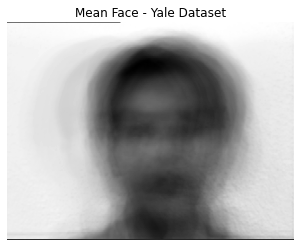

In [69]:
#plt.imshow(MeanFaces[0])

plt.title("Mean Face - Yale Dataset")
plt.axis("off")
plt.imshow(np.mean(np.array(MeanFaces),axis=0).reshape(xSize,ySize),cmap='gray')
plt.show()

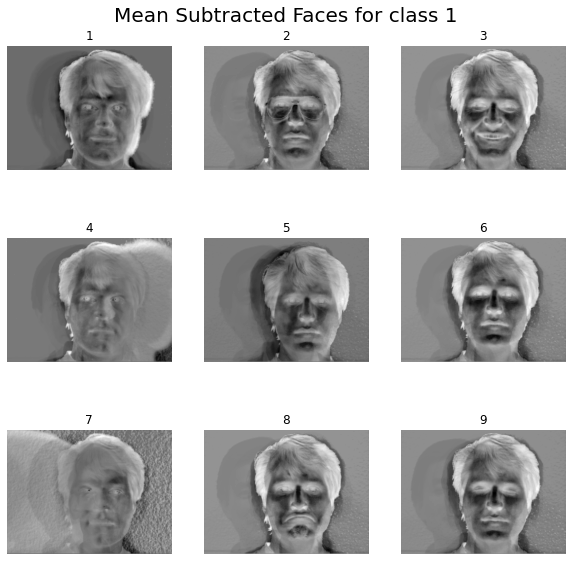

In [183]:
ov_mean = np.mean(np.array(MeanFaces),axis=0)
#plt.imshow(MeanFaces[0].reshape(xSize,ySize))
#plt.title("Class Mean Space")
# Class 1
sub = (ov_mean-newFaces[0])
#for i in range(len(sub)):
#    plt.imshow((sub[i].reshape(xSize,ySize)),cmap='gray')
#    plt.show()

fig = plt.figure(figsize=(10,10))
plt.title("Mean Subtracted Faces for class 1", fontsize = "20")
cols=3
rows=3
for i in range(cols*rows):
    plt.axis('off')
    fig.add_subplot(rows,cols,i+1).sharey
    plt.imshow(sub[i].reshape(xSize,ySize),cmap='gray')
    plt.axis('off')
    plt.title(i+1)      

#print("Sub shape: ",Covariance.shape)
#FaceSpace,Images = FindFaceSpace(Covariance,subtracted_Mean,xDim,yDim)
#plotFaces(FaceSpace,"Top 50 eigenfaces\n")
#Weights_Faces = np.dot(subtracted_Mean,np.dot(Images,np.linalg.inv(np.dot(Images.T,Images))))
#for i in range(len(Data)):
#    jj = Data[1][0].reshape(newFaces = np.array(Data[i+1]).reshape(np.array(Data[1]).shape[0],-1)
#    MeanFaces.append(np.mean(newFaces,axis=0))


In [186]:
cov = np.dot(sub,sub.T)
w,v = np.linalg.eig(Covariance)